In [1]:
## Author: Juan Maroñas (juan.maronnas@uam.es). Machine Learning Group, Universidad Autónoma de Madrid
## Deep into Prophet through Tutorials

## Customizing the trend model


In [2]:
## Python
import os

## Standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

usetex = mpl.checkdep_usetex(True)

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': usetex,
    'pgf.rcfonts': False,
    'xtick.bottom': True,
    'xtick.labelbottom': True,
    'ytick.left': True,
    'ytick.labelleft': True,
})

mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,amssymb,amsfonts,amsthm}'
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25
mpl.rcParams['axes.titlesize'] = 25


## Prophet
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [3]:
## ========================================================================================== ##
## ===================================== CASE STUDY 1  ====================================== ##
## Types of trend models: Prophet can use two types of trend models. One is a linear (unconstrained) model
#  and the other can specify a saturating point for the trend, i.e. a maximum value

# The rest of jupyters where using the linear trend model, thus we only see here the saturating one.

## =====================================
## ============ 1.Saturating
# For the constrained one, the maximum achivable value must be made by an expert or using data.

## Read data
data_dir = os.path.join('../data/','example_wp_log_R.csv') 
df       = pd.read_csv(data_dir)

# cast to datetime type
df['ds_plot'] = df['ds']
df['ds']      = pd.to_datetime(df['ds'])


Text(0.5, 1.0, 'Whole temporal serie')

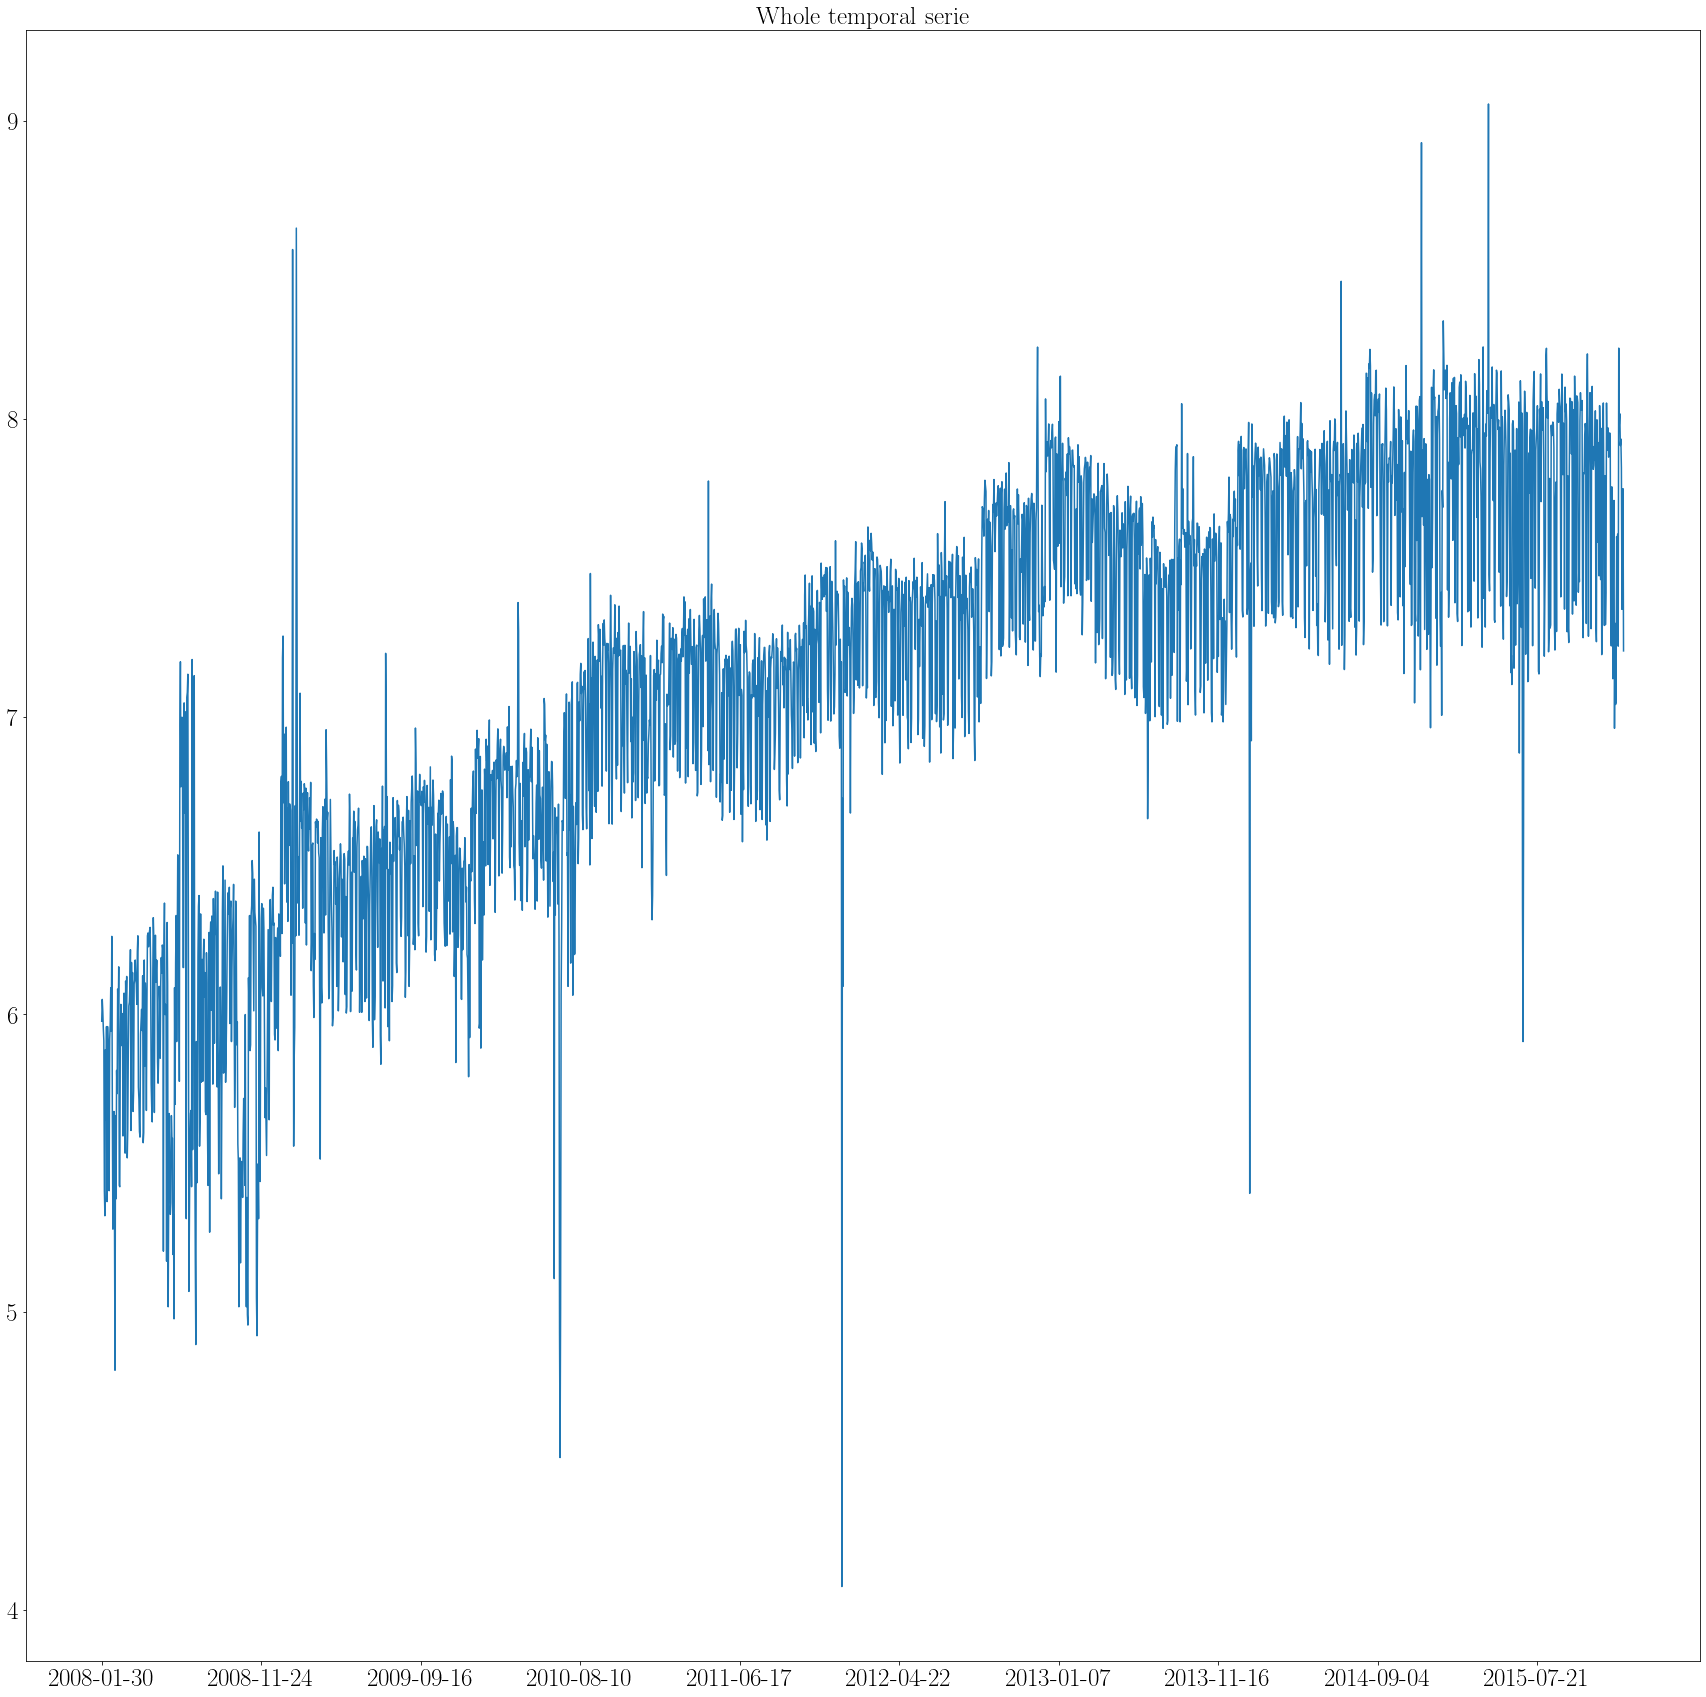

In [4]:
## Visualize whole series
fig, ax = plt.subplots(1,1,figsize=(30,30))

x = np.arange(0,len(df['y']))

ax.plot(x,df['y'])
ax.set_xticks(x[0::300], labels = df['ds_plot'][0::300])
ax.set_title('Whole temporal serie')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


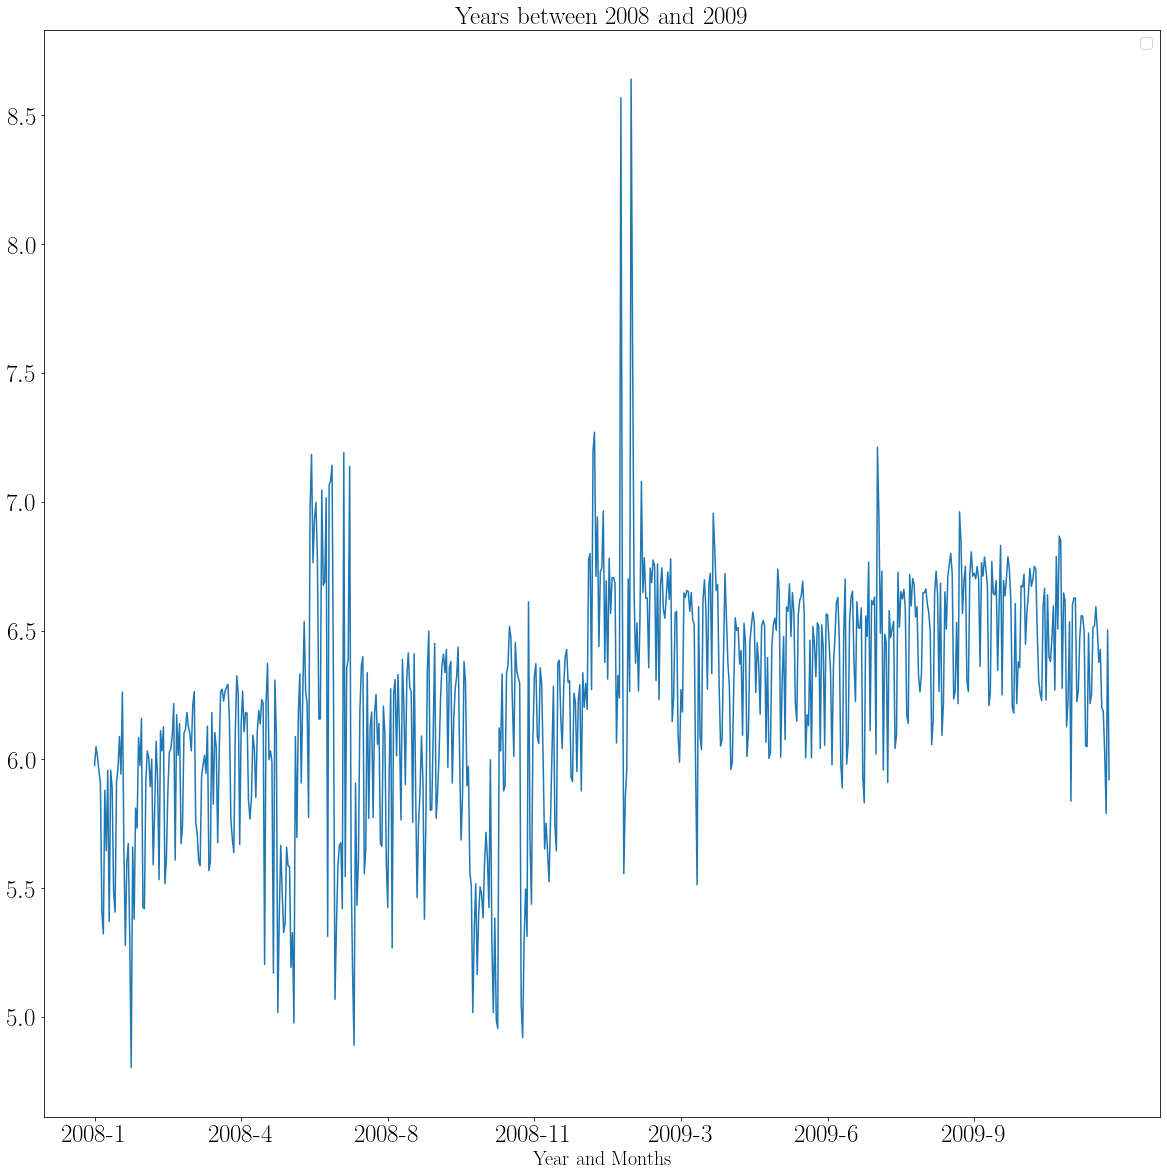

In [5]:
## Visualize a couple of years
target_years = [2008, 2009]
df_one_year  = df[ (df['ds'].dt.year >= target_years[0]) & (df['ds'].dt.year <= target_years[-1]) ]
                   
fig, ax = plt.subplots(1,1,figsize=(20,20))

x = np.arange(0,len(df_one_year['y']))

ax.plot(x,df_one_year['y'])
ax.set_xticks(x[0::100], labels =  ['{}-{}'.format(i.year,i.month) for i in df_one_year['ds'][0::100] ]  )
ax.set_title('Years between {} and {}'.format(target_years[0],target_years[-1]))
ax.set_xlabel('Year and Months')
ax.legend()

## We can see anual periodicity plus outliers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


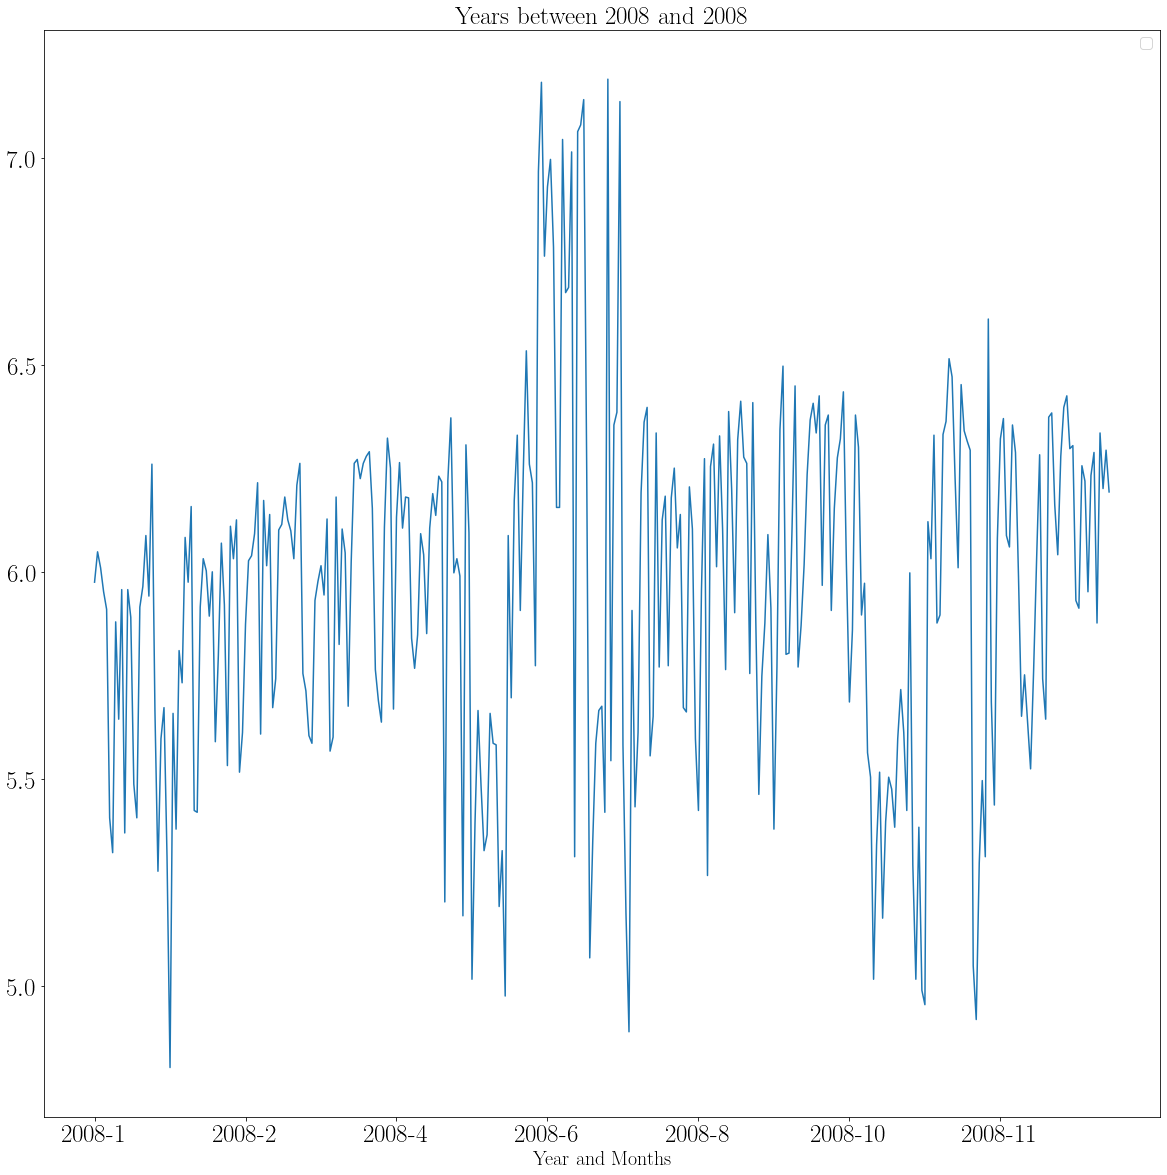

In [6]:
## Visualize a year
target_years = [2008, 2008]
df_one_year  = df[ (df['ds'].dt.year >= target_years[0]) & (df['ds'].dt.year <= target_years[-1]) ]
                   
fig, ax = plt.subplots(1,1,figsize=(20,20))

x = np.arange(0,len(df_one_year['y']))

ax.plot(x,df_one_year['y'])
ax.set_xticks(x[0::50], labels =  ['{}-{}'.format(i.year,i.month) for i in df_one_year['ds'][0::50] ]  )
ax.set_title('Years between {} and {}'.format(target_years[0],target_years[-1]))
ax.set_xlabel('Year and Months')
ax.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


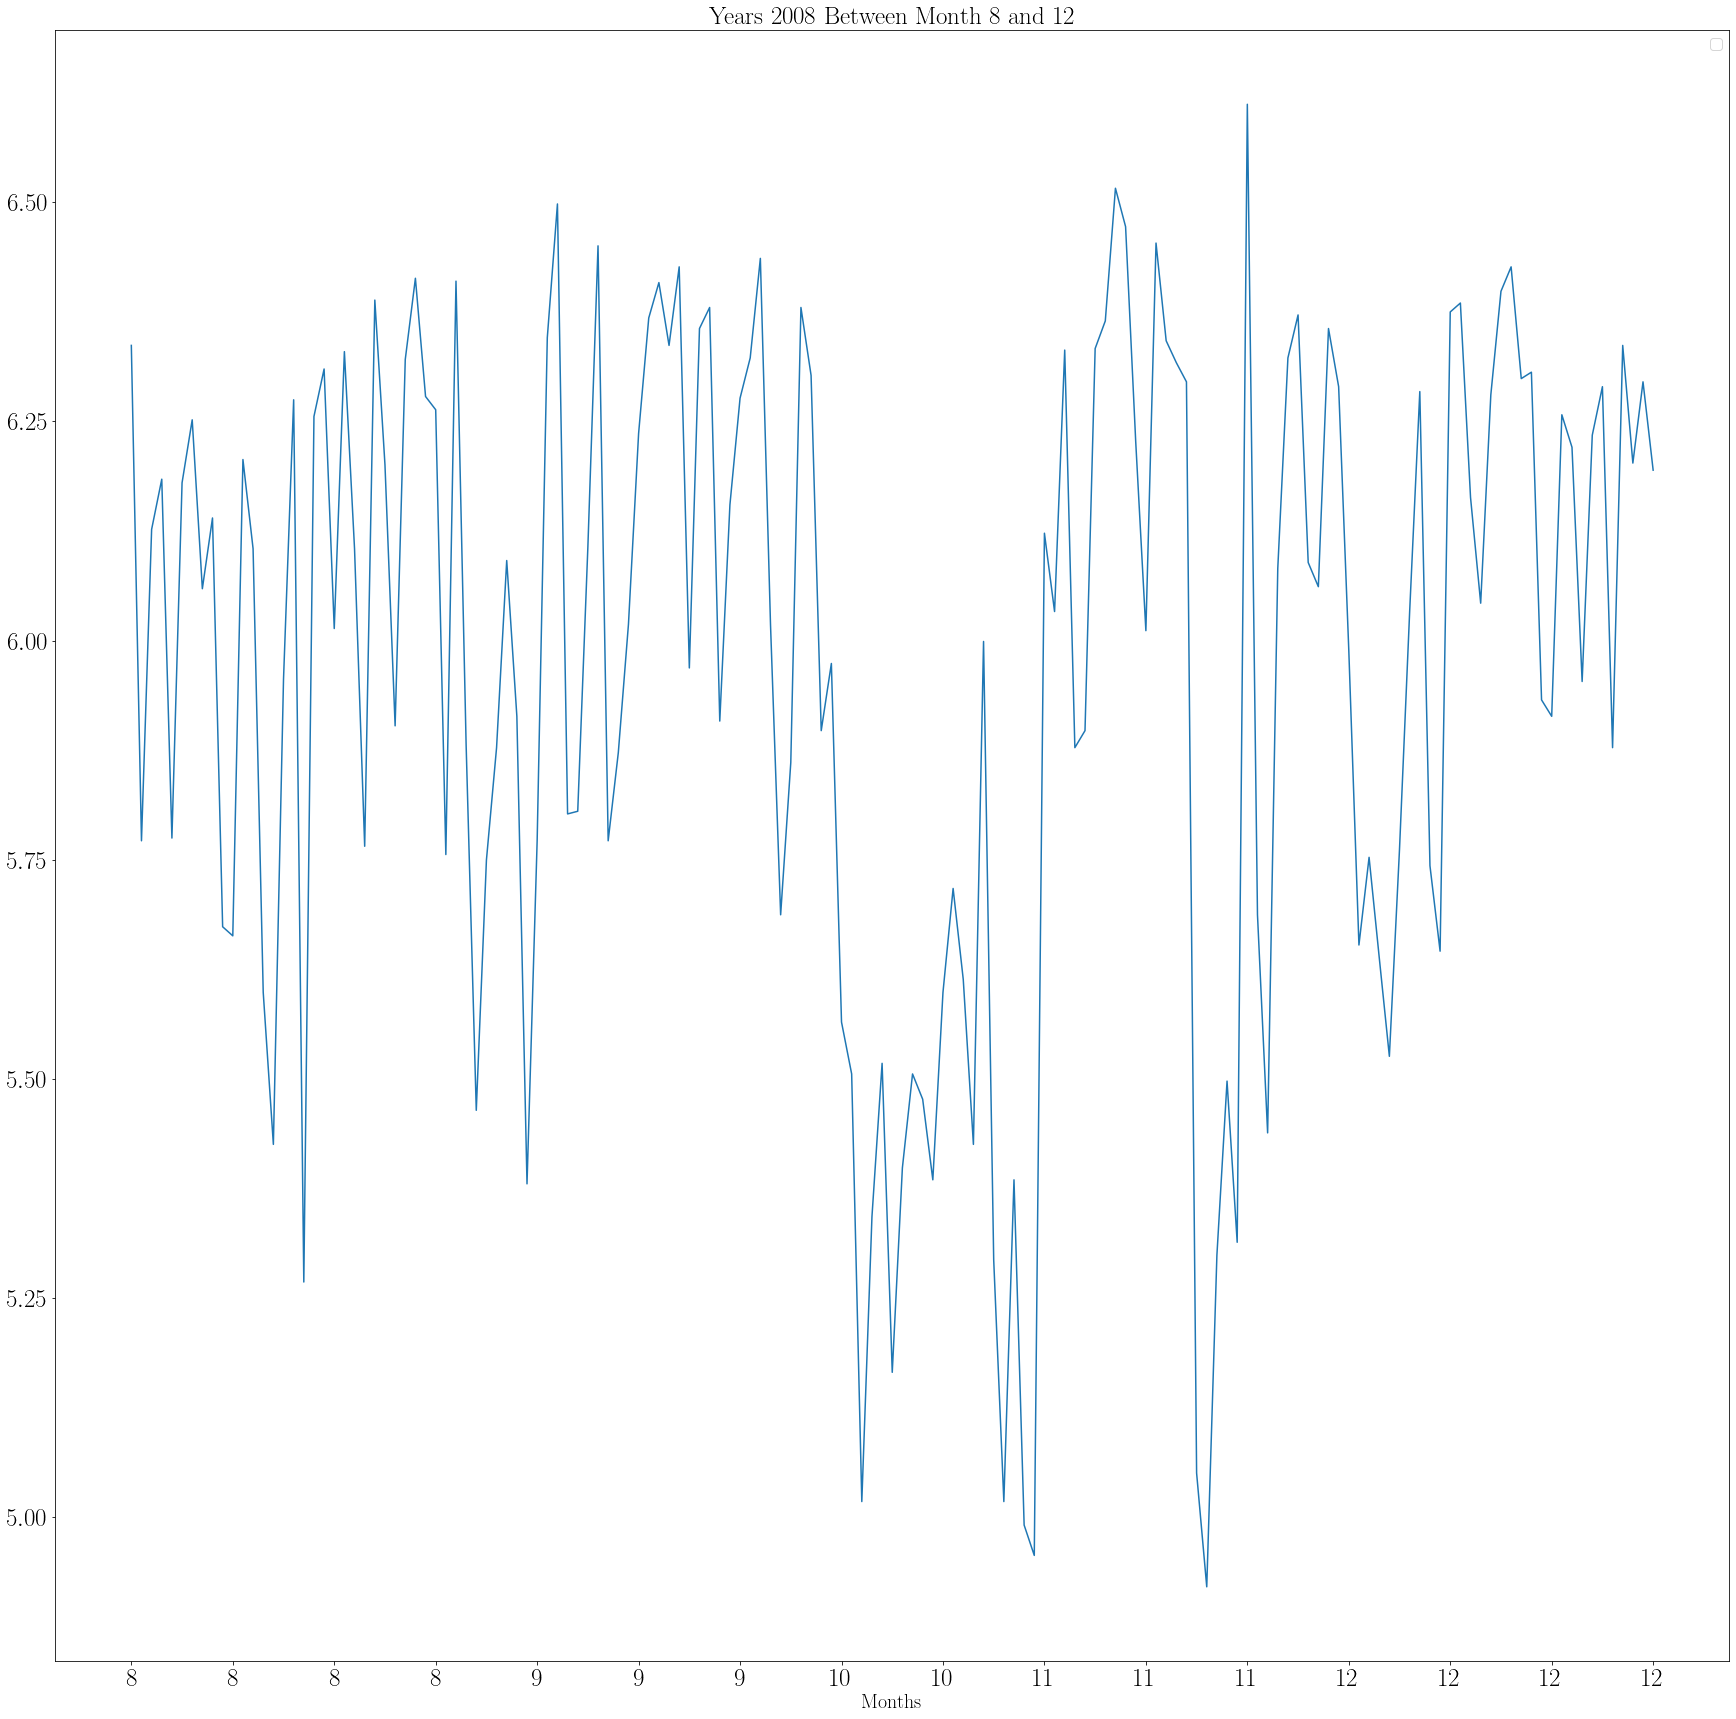

In [7]:
## Visualize a year and a month
target_years = [2008, 2008]
df_one_year  = df[ (df['ds'].dt.year >= target_years[0]) & (df['ds'].dt.year <= target_years[-1]) ]

target_months  = [8,12]
df_one_year  = df_one_year[ (df_one_year['ds'].dt.month >= target_months[0]) & (df_one_year['ds'].dt.month <= target_months[-1]) ]
                   
fig, ax = plt.subplots(1,1,figsize=(30,30))

x = np.arange(0,len(df_one_year['y']))

ax.plot(x,df_one_year['y'])
ax.set_xticks(x[0::10], labels =  ['{}'.format(i.month) for i in df_one_year['ds'][0::10] ]  )
ax.set_title('Years {} Between Month {} and {}'.format(target_years[0],target_months[0],target_months[-1]))
ax.set_xlabel('Months')
ax.legend()


In [8]:
C_train  = 9
model = Prophet(
                    interval_width      = 0.95,  
                    uncertainty_samples = 1000,
                    yearly_seasonality  = True,  
                    weekly_seasonality  = True,  
                    daily_seasonality   = False,
                    growth              = 'logistic', ## This is the parameter saying prophet to use a saturating trend model
                    seasonality_mode    = 'additive' 
                )

In [9]:
## We add to the dataset the maximum capacity
df['cap'] = C_train


In [10]:
model.fit(df)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.4033
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9006.89    0.00141836        689.42      0.4877      0.9458      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111        9008.4   0.000144847       145.325   8.521e-07       0.001      179  LS failed, Hessian reset 
     199       9013.68    0.00349379       230.423      0.4438           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9017.65    9.4274e-05        58.091      0.6917      0.6917      401   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     352       9017.76   2.76229e-07       66.2675      0.4088      0.7579      472   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [11]:
forecast = model.predict(df)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


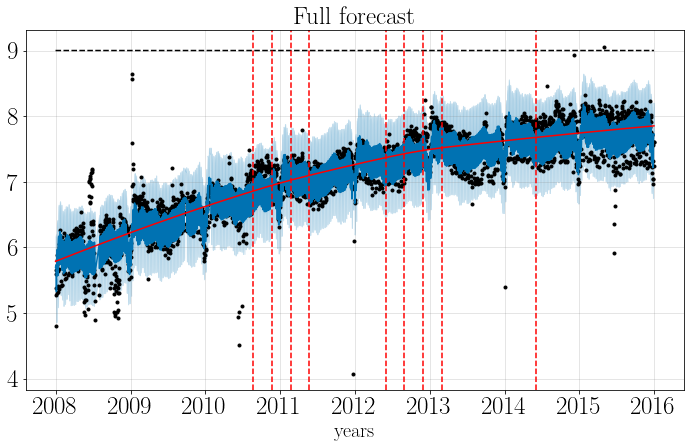

In [12]:
## Visualize forecasting
fig = model.plot(forecast)
plt.xlabel('years')
plt.ylabel('')
plt.title('Full forecast')

## add change points via matplotlib figure pointer
add_changepoints_to_plot(fig.gca(), model, forecast)
print("")

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 146.8592120368929, 'Year')

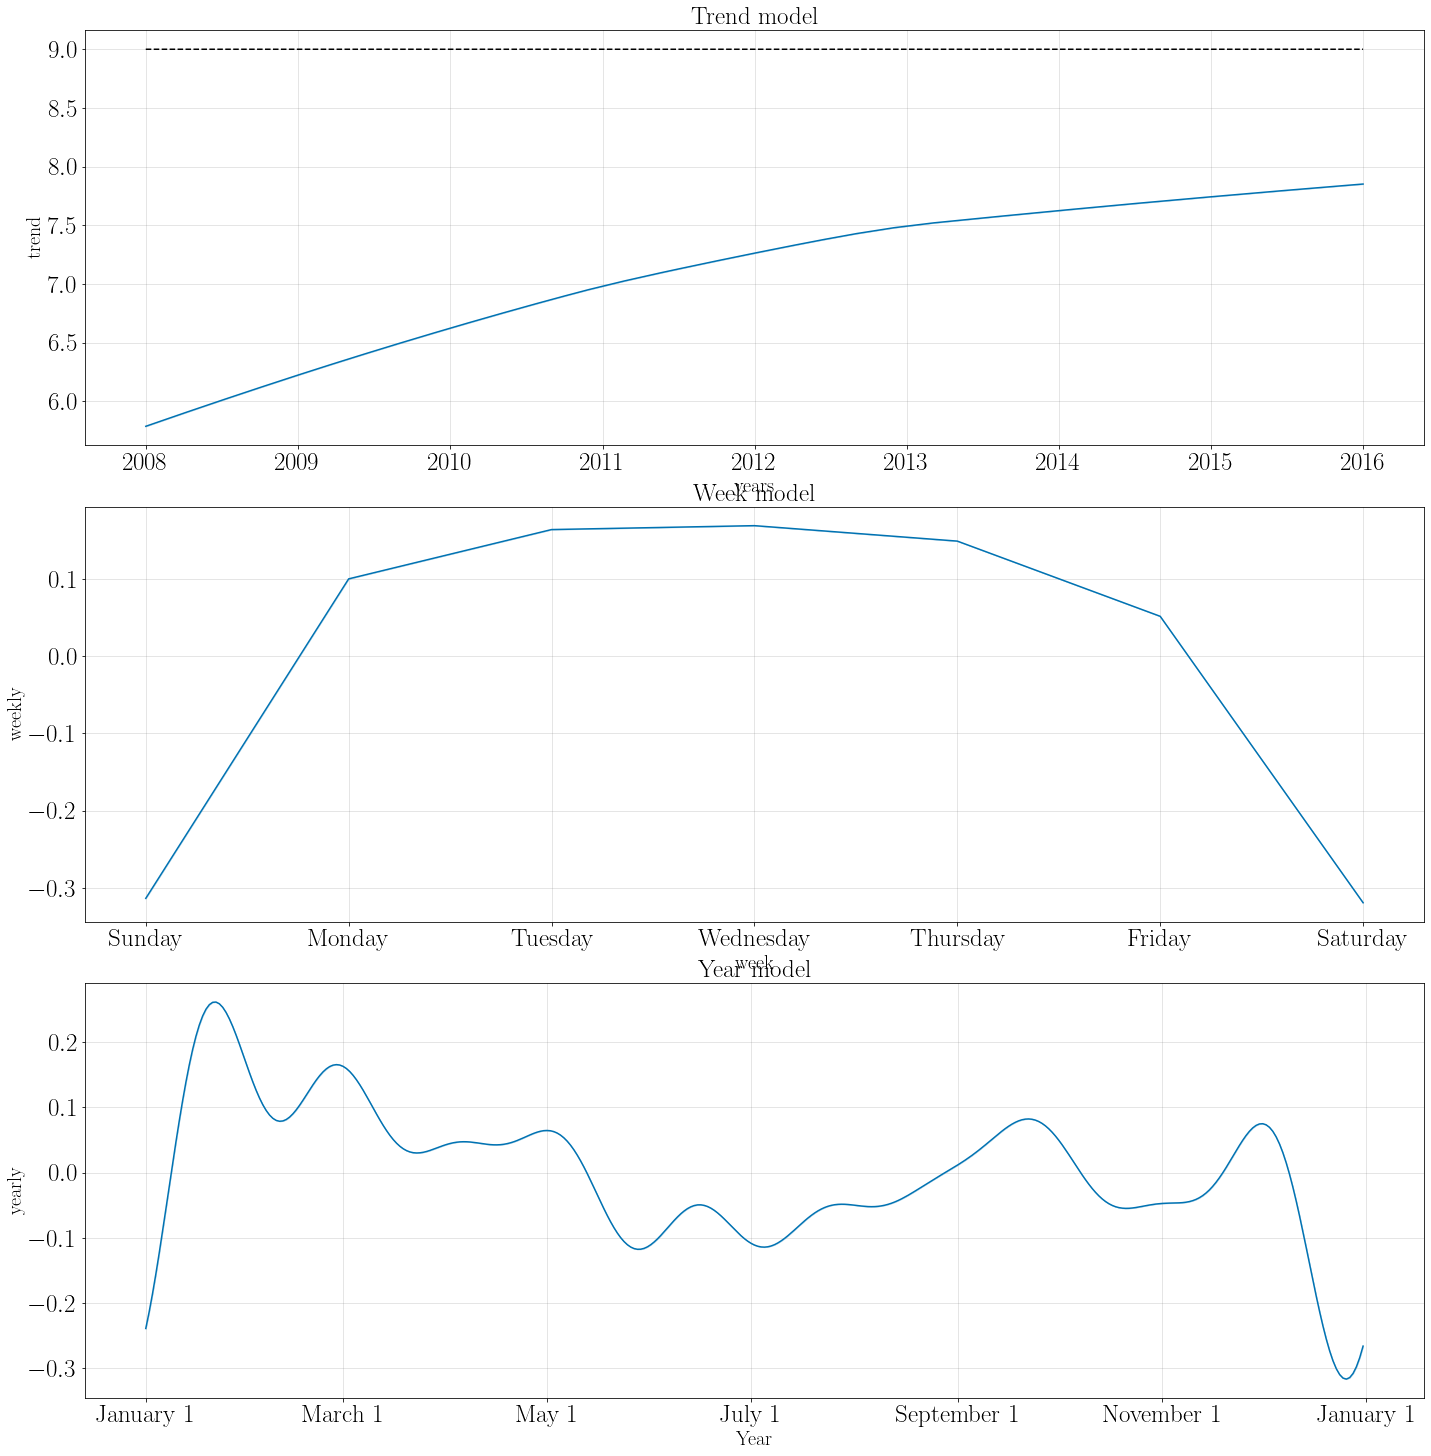

In [13]:
## Visualize the individual models used to create the observation model
fig     = model.plot_components(forecast, figsize = (20,20) )


ax1,ax2,ax3 = fig.get_axes()


ax1.set_xlabel('years')
ax1.set_title('Trend model')

ax2.set_title('Week model')
ax2.set_xlabel('week')

ax3.set_title('Year model')
ax3.set_xlabel('Year')

#ax4.set_title('Month model')
#ax4.set_xlabel('Month')


In [14]:
## We can use different caps in different periods

C_summer  = 6
C_winter  = 9
model = Prophet(
                    interval_width      = 0.95,  
                    uncertainty_samples = 1000,
                    yearly_seasonality  = True,  
                    weekly_seasonality  = True,  
                    daily_seasonality   = False,
                    growth              = 'logistic', ## This is the parameter saying prophet to use a saturating trend model
                    seasonality_mode    = 'additive' 
                )

In [15]:
## We add to the dataset the maximum capacity
## Add a boolean column to the dataset where this will be specified.
def is_summer(ds):
    date = pd.to_datetime(ds)
    if date.month >= 6 and date.month <= 8:
        return C_summer
    else:
        return C_winter

df['cap'] = df['ds'].apply(is_summer)



In [16]:
model.fit(df)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -55.7224


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7891.85     0.0145562       218.846           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     192       7897.21   0.000645283       260.398   4.006e-06       0.001      280  LS failed, Hessian reset 
     199       7898.07    0.00124374       143.059           1           1      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     276       7902.61   0.000486154       206.893   1.613e-06       0.001      421  LS failed, Hessian reset 
     299       7904.17    0.00134145       204.276           1           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     347       7905.42   0.000443152       180.142   3.709e-06       0.001      535  LS failed, Hessian reset 
     392       7905.59   2.67511e-07  

In [17]:
forecast = model.predict(df)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 1.0, 'Full forecast')

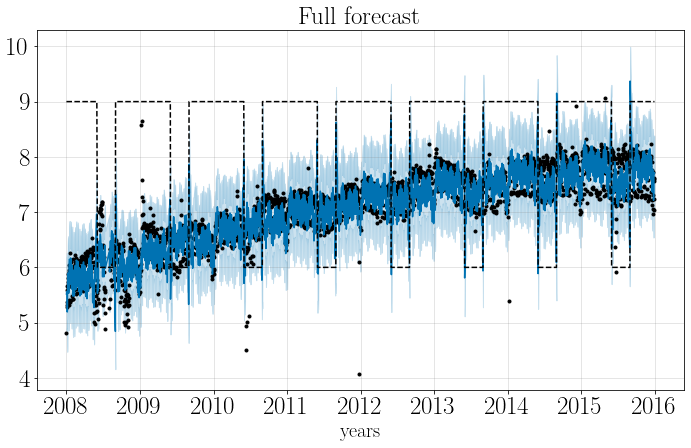

In [18]:
## Visualize forecasting
fig = model.plot(forecast)
plt.xlabel('years')
plt.ylabel('')
plt.title('Full forecast')

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 146.8592120368929, 'Year')

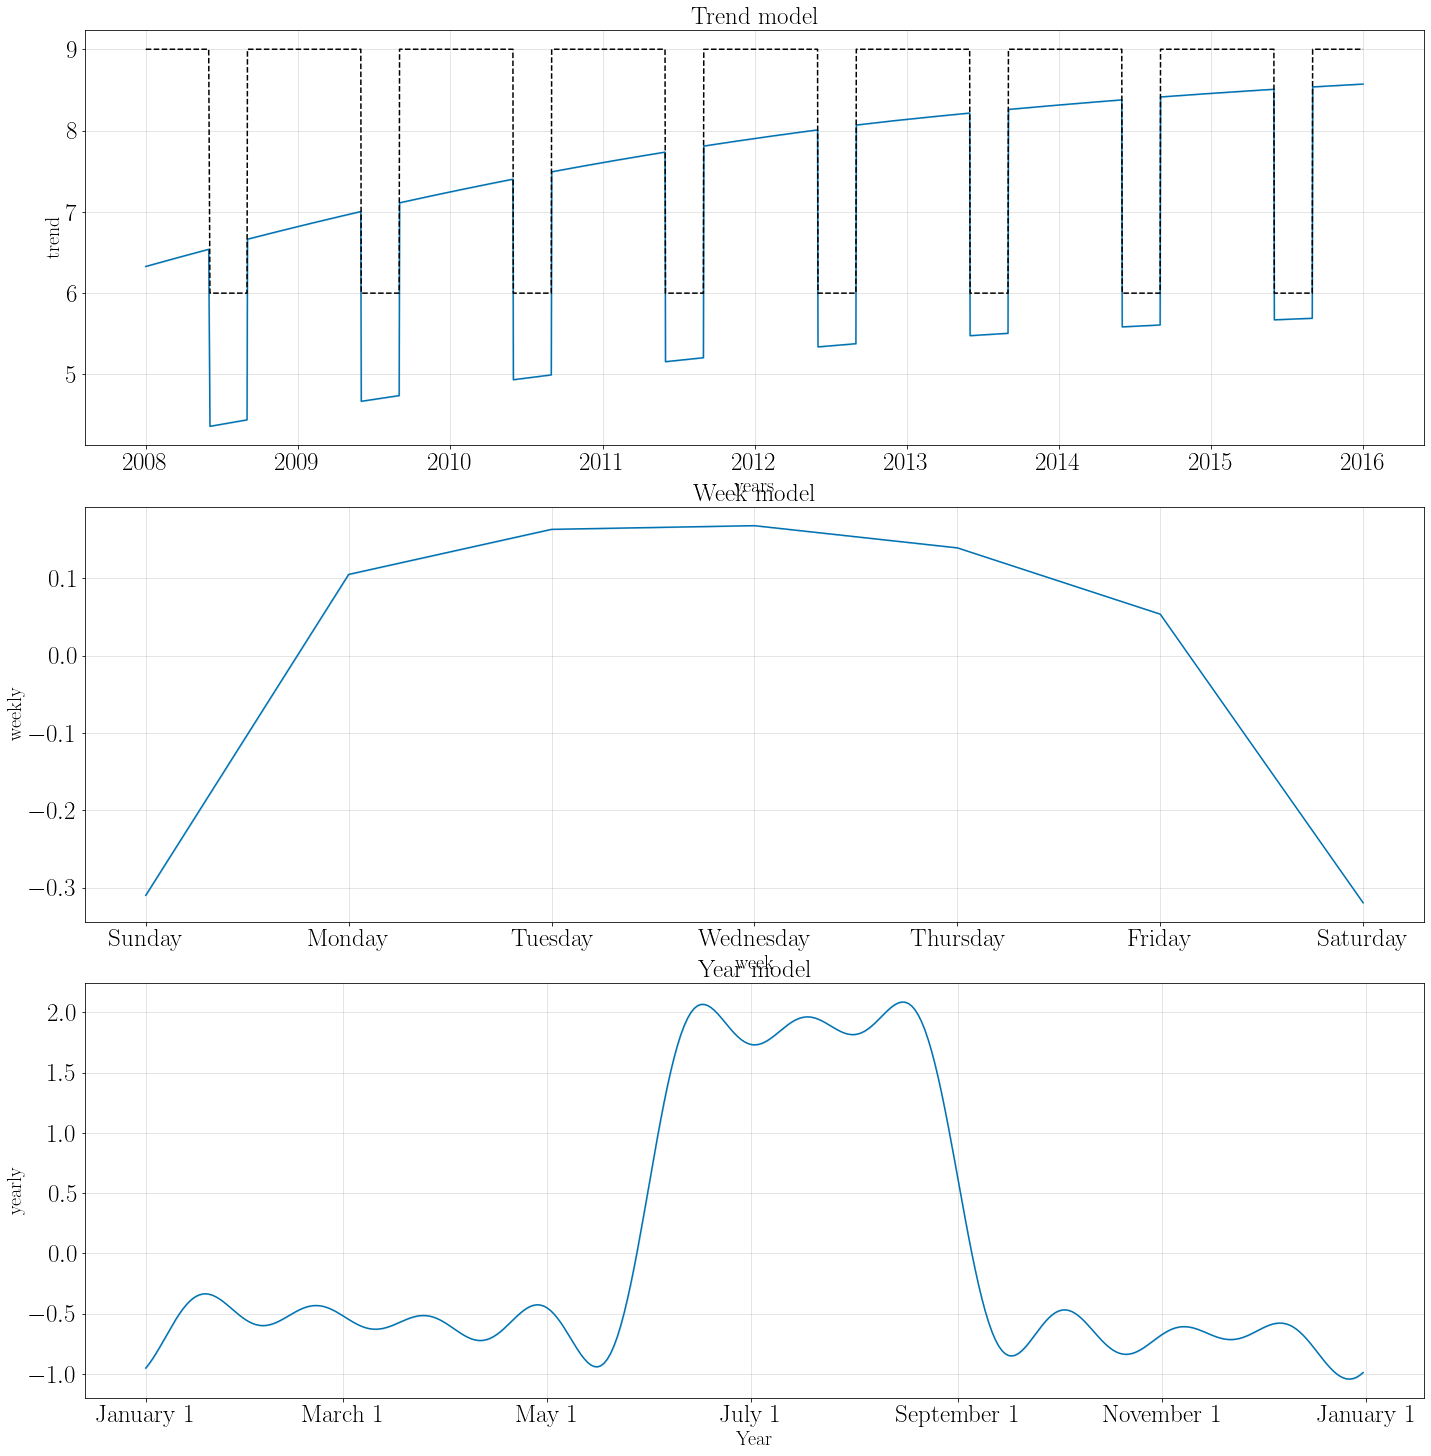

In [19]:
## Visualize the individual models used to create the observation model
fig     = model.plot_components(forecast, figsize = (20,20) )


ax1,ax2,ax3 = fig.get_axes()


ax1.set_xlabel('years')
ax1.set_title('Trend model')

ax2.set_title('Week model')
ax2.set_xlabel('week')

ax3.set_title('Year model')
ax3.set_xlabel('Year')



In [20]:
## ==========================================================================================
## ==========================================================================================
## ==========================================================================================
## NOTE: A saturating minimum can be specified in the same way using 'lower' instead of 'cap'
## ==========================================================================================
## ==========================================================================================
## ==========================================================================================

In [21]:
## ========================================================================================== ##
## ===================================== CASE STUDY 2  ====================================== ##
## Automatic change points detection: Prophet can learn different parameters of the trend at 
#  different time periods the time period where the parameter of the trend model changes is 
#  known as change point. Change points can be set by hand or learned automatically by prophet.
#  For this example we will use a linear trend model.


In [22]:
## Read data
data_dir = os.path.join('../data/','example_wp_log_peyton_manning.csv') 
df       = pd.read_csv(data_dir)

# cast to datetime type
df['ds_plot'] = df['ds']
df['ds']      = pd.to_datetime(df['ds'])

Text(0.5, 1.0, 'Whole temporal serie')

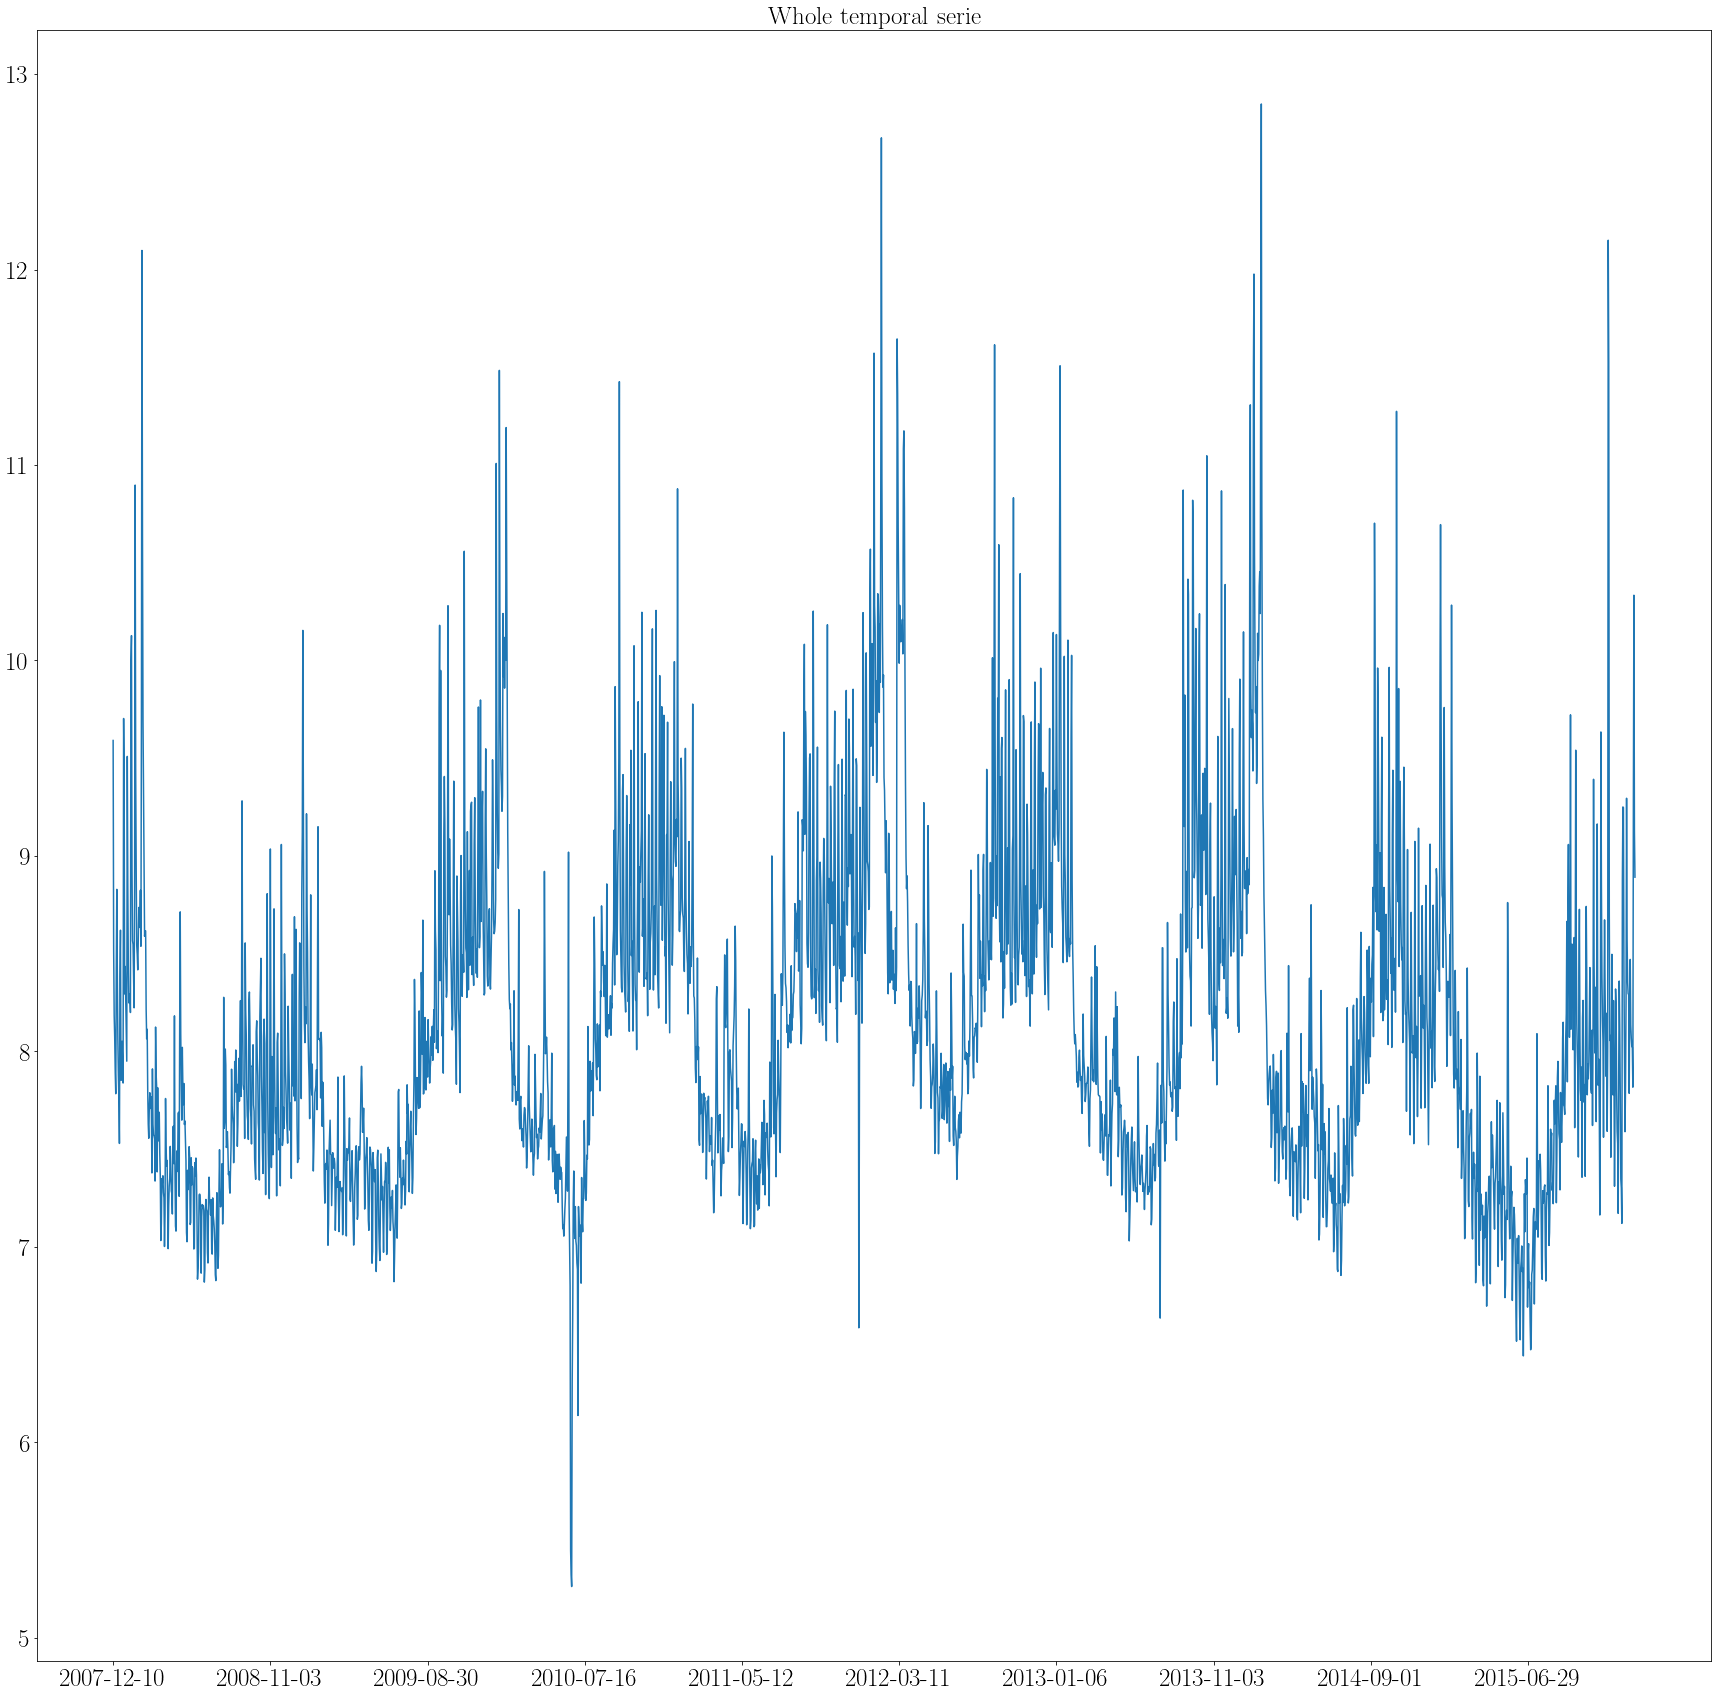

In [23]:
## Visualize whole series
fig, ax = plt.subplots(1,1,figsize=(30,30))

x = np.arange(0,len(df['y']))

ax.plot(x,df['y'])
ax.set_xticks(x[0::300], labels = df['ds_plot'][0::300])
ax.set_title('Whole temporal serie')

# we can see several change points

In [24]:
changepoint_prior_scale = 0.05 # default prophet 0.05 ( try 50)
                               # Prophet learns a piece wise trend model by varying its parameter using additive
                               # learnable variables. For example w + z1 + z2 + z3 implies learning a 4 wise
                               # trend model. Then, a laplace prior is placed over zi so that we can prune
                               # this variables to 0 in an optimization mode (and also MCMC). This parameter
                               # controls the scale of the laplace prior. It is related to the parameter of 
                               # an L1 regularizer. The bigger this parameter the smaller the induced sparsity / 
                               # pruning effect.

                               # The choice of this parameter when you fit the model using MCMC must take into account
                               # your prior belief about the series, otherwise the prior will be mispecified and thus
                               # biasing uncertainty quantification. This is a much more complex story that requires
                               # time to talk about.

n_changepoints = 25  # number of changepoints placed a priori by prophet. Some of this will be pruned and this
                     # depends on the changepoint_prior_scale

model = Prophet(
                    interval_width          = 0.95,  
                    uncertainty_samples     = 1000,
                    changepoint_prior_scale = changepoint_prior_scale,  
                    n_changepoints          = n_changepoints, 
                )

In [25]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7975.23    0.00333027       229.371           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7993.56   0.000129511       136.478     0.02731           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7997.17   0.000734911       157.438      0.8599      0.8599      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       7998.51   8.30685e-05       244.937   2.117e-07       0.001      442  LS failed, Hessian reset 
     399       8000.57   8.73339e-05       65.5818           1           1      533   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8002.44   0.000319089    

In [26]:
forecast = model.predict(df)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [27]:
## Make a prediction.

print(model.params.keys())

print('Sigma observation model \n ', model.params['sigma_obs'])

print('Fourier coefficients    \n ', model.params['beta'].shape) 

print('Places where prophet thinks a change point appears \n ', model.params['delta'].shape)

print('Growth rate parameter \n',  model.params['k'].shape)

print('Offset parameter \n',  model.params['m'].shape)

print('No idea \n', model.params['trend'].shape)

dict_keys(['k', 'm', 'delta', 'sigma_obs', 'beta', 'trend'])
Sigma observation model 
  [[0.03760089]]
Fourier coefficients    
  (1, 26)
Places where prophet thinks a change point appears 
  (1, 25)
Growth rate parameter 
 (1, 1)
Offset parameter 
 (1, 1)
No idea 
 (1, 2905)


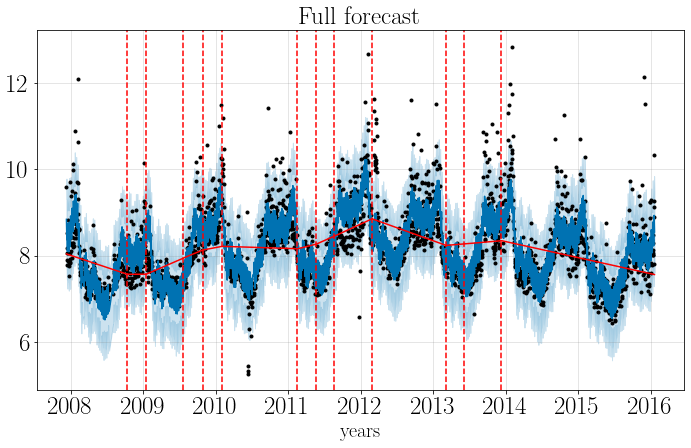

In [28]:
## Visualize forecasting
fig = model.plot(forecast)
plt.xlabel('years')
plt.ylabel('')
plt.title('Full forecast')

## add change points via matplotlib figure pointer
add_changepoints_to_plot(fig.gca(), model, forecast)
print("")

In [29]:
print('Places where prophet thinks a change point appears \n ', model.params['delta'])

print('Growth rate parameter \n',  model.params['k'])


Places where prophet thinks a change point appears 
  [[-6.05871238e-07 -1.86563253e-06  3.53963389e-01  4.64608883e-01
  -4.02260597e-07 -2.11452799e-02 -2.35737996e-01 -2.41342128e-01
   4.51978628e-07  1.73519510e-09 -8.07398848e-07  2.95740449e-01
   2.07427412e-01  2.03867781e-02  4.57875295e-04 -8.71147931e-01
  -6.14889792e-07  6.81141420e-09  4.31760867e-05  4.65879613e-01
   1.07646873e-02  2.34026255e-07 -3.29386774e-01 -5.70321933e-06
   4.86137771e-09]]
Growth rate parameter 
 [[-0.35561655]]


<BarContainer object of 25 artists>

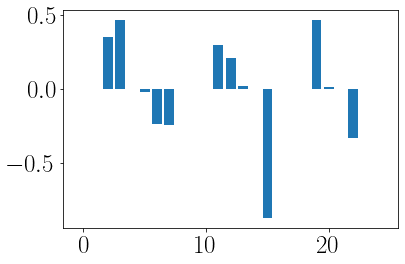

In [30]:
## Visualize rate change
plt.bar(np.arange(model.params['delta'].shape[1]),model.params['delta'].squeeze())


In [31]:
print('Growth rate parameter \n',  model.params['k'])

Growth rate parameter 
 [[-0.35561655]]


/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 146.8592120368929, 'Year')

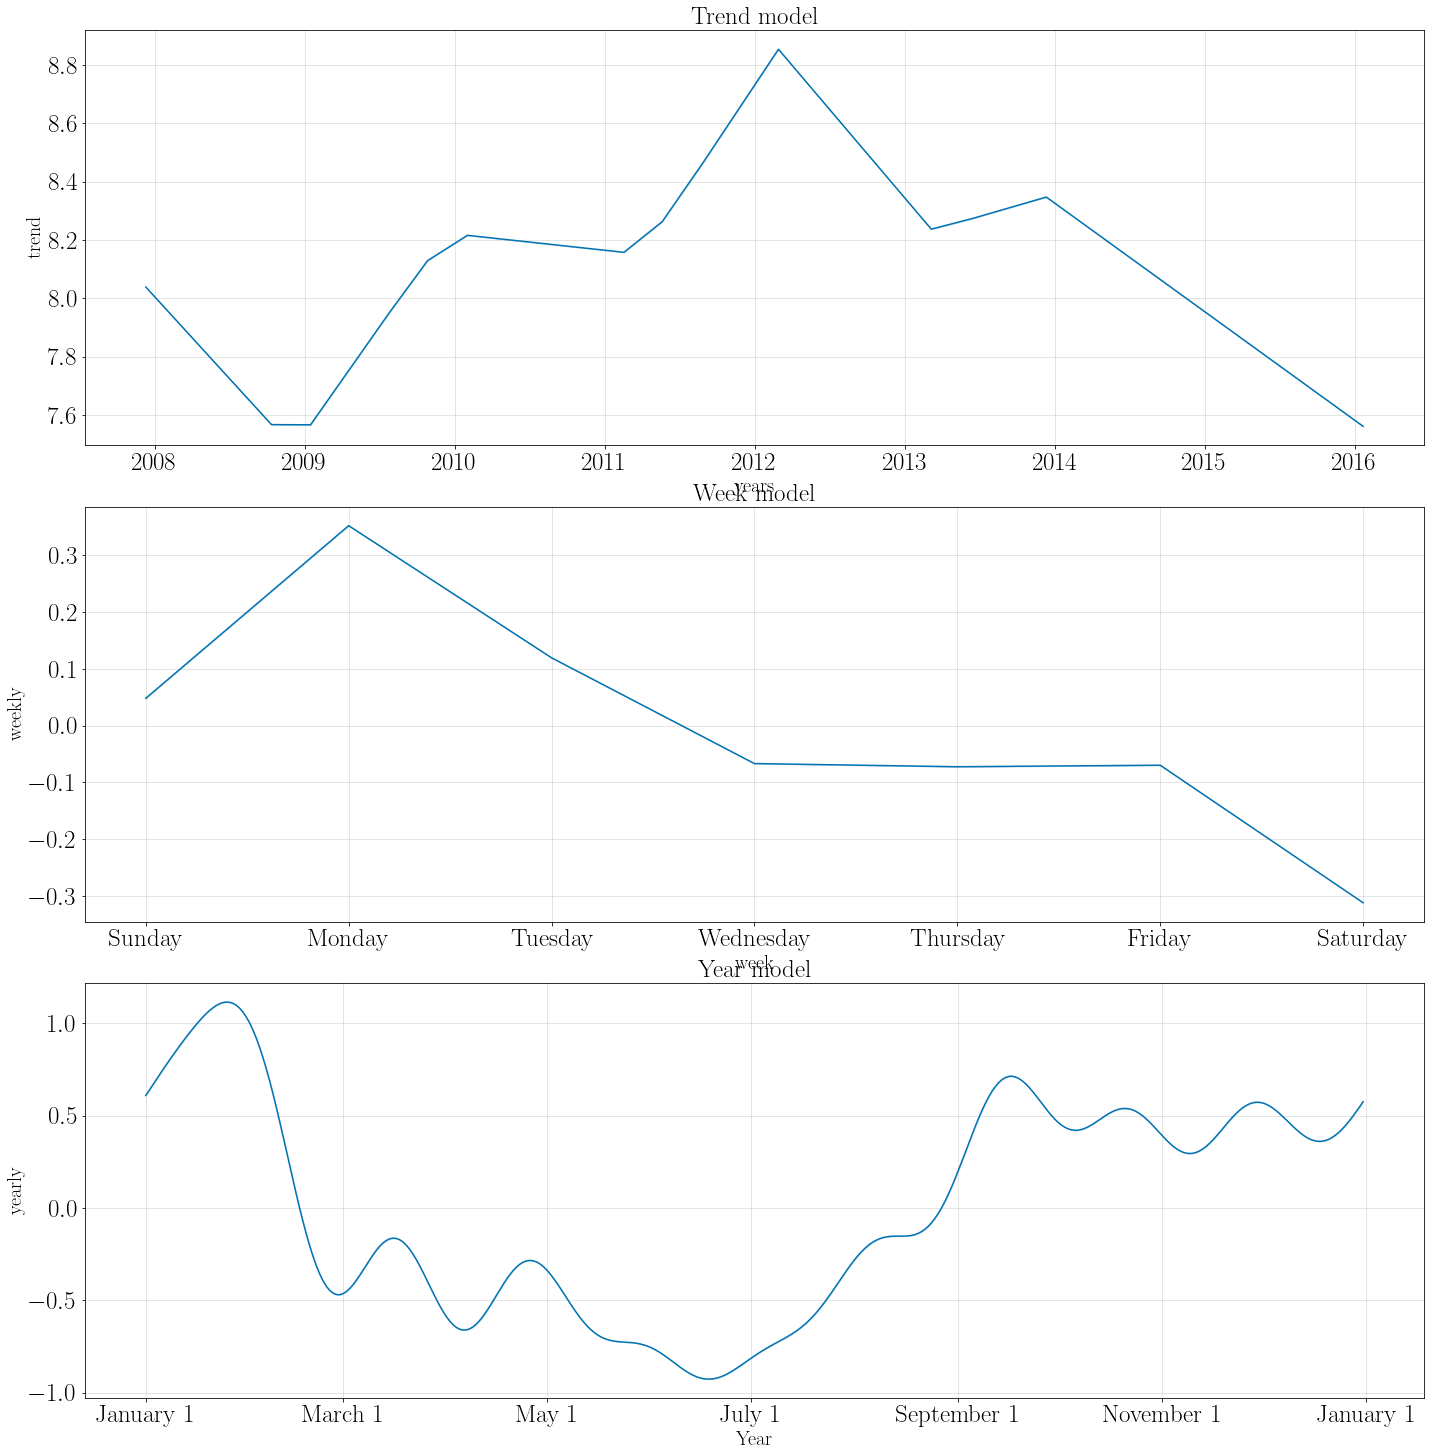

In [32]:
## Visualize the individual models used to create the observation model
fig     = model.plot_components(forecast, figsize = (20,20) )


ax1,ax2,ax3  = fig.get_axes()


ax1.set_xlabel('years')
ax1.set_title('Trend model')

ax2.set_title('Week model')
ax2.set_xlabel('week')

ax3.set_title('Year model')
ax3.set_xlabel('Year')



In [33]:
## ========================================================================================== ##
## ===================================== CASE STUDY 3  ====================================== ##
## Manual change points: Prophet allow you to set where the change points appear.


In [34]:
changepoint_prior_scale = 50

model = Prophet(
                    interval_width          = 0.95,  
                    uncertainty_samples     = 1000,
                    changepoint_prior_scale = changepoint_prior_scale,  
                    changepoints            = ['01-03-2013','01-06-2015'], 
                )

In [35]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       7865.24   0.000133909       1.51054           1           1      112   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [36]:
forecast = model.predict(df)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [37]:
print(model.params.keys())

print('Sigma observation model \n ', model.params['sigma_obs'])

print('Fourier coefficients    \n ', model.params['beta'].shape) 

print('Places where prophet thinks a change point appears \n ', model.params['delta'].shape)

print('Growth rate parameter \n',  model.params['k'].shape)

print('Offset parameter \n',  model.params['m'].shape)

print('No idea \n', model.params['trend'].shape)

dict_keys(['k', 'm', 'delta', 'sigma_obs', 'beta', 'trend'])
Sigma observation model 
  [[0.04045943]]
Fourier coefficients    
  (1, 26)
Places where prophet thinks a change point appears 
  (1, 2)
Growth rate parameter 
 (1, 1)
Offset parameter 
 (1, 1)
No idea 
 (1, 2905)


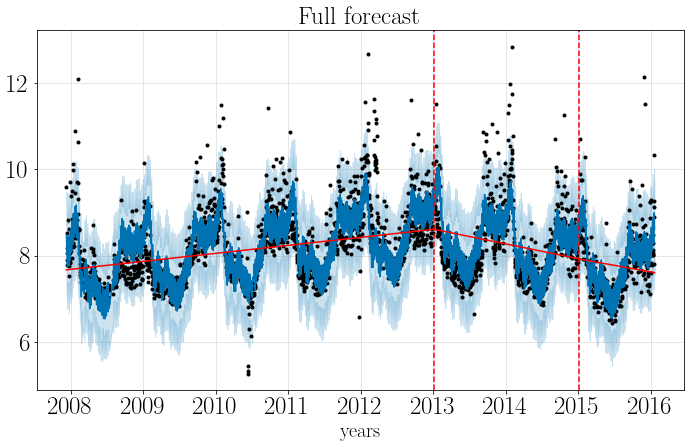

In [38]:
## Visualize forecasting
fig = model.plot(forecast)
plt.xlabel('years')
plt.ylabel('')
plt.title('Full forecast')

## add change points via matplotlib figure pointer
add_changepoints_to_plot(fig.gca(), model, forecast)
print("")

<BarContainer object of 2 artists>

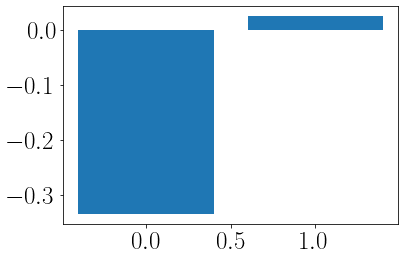

In [39]:
## Visualize rate change
plt.bar(np.arange(model.params['delta'].shape[1]),model.params['delta'].squeeze())


/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Text(0.5, 146.8592120368929, 'Year')

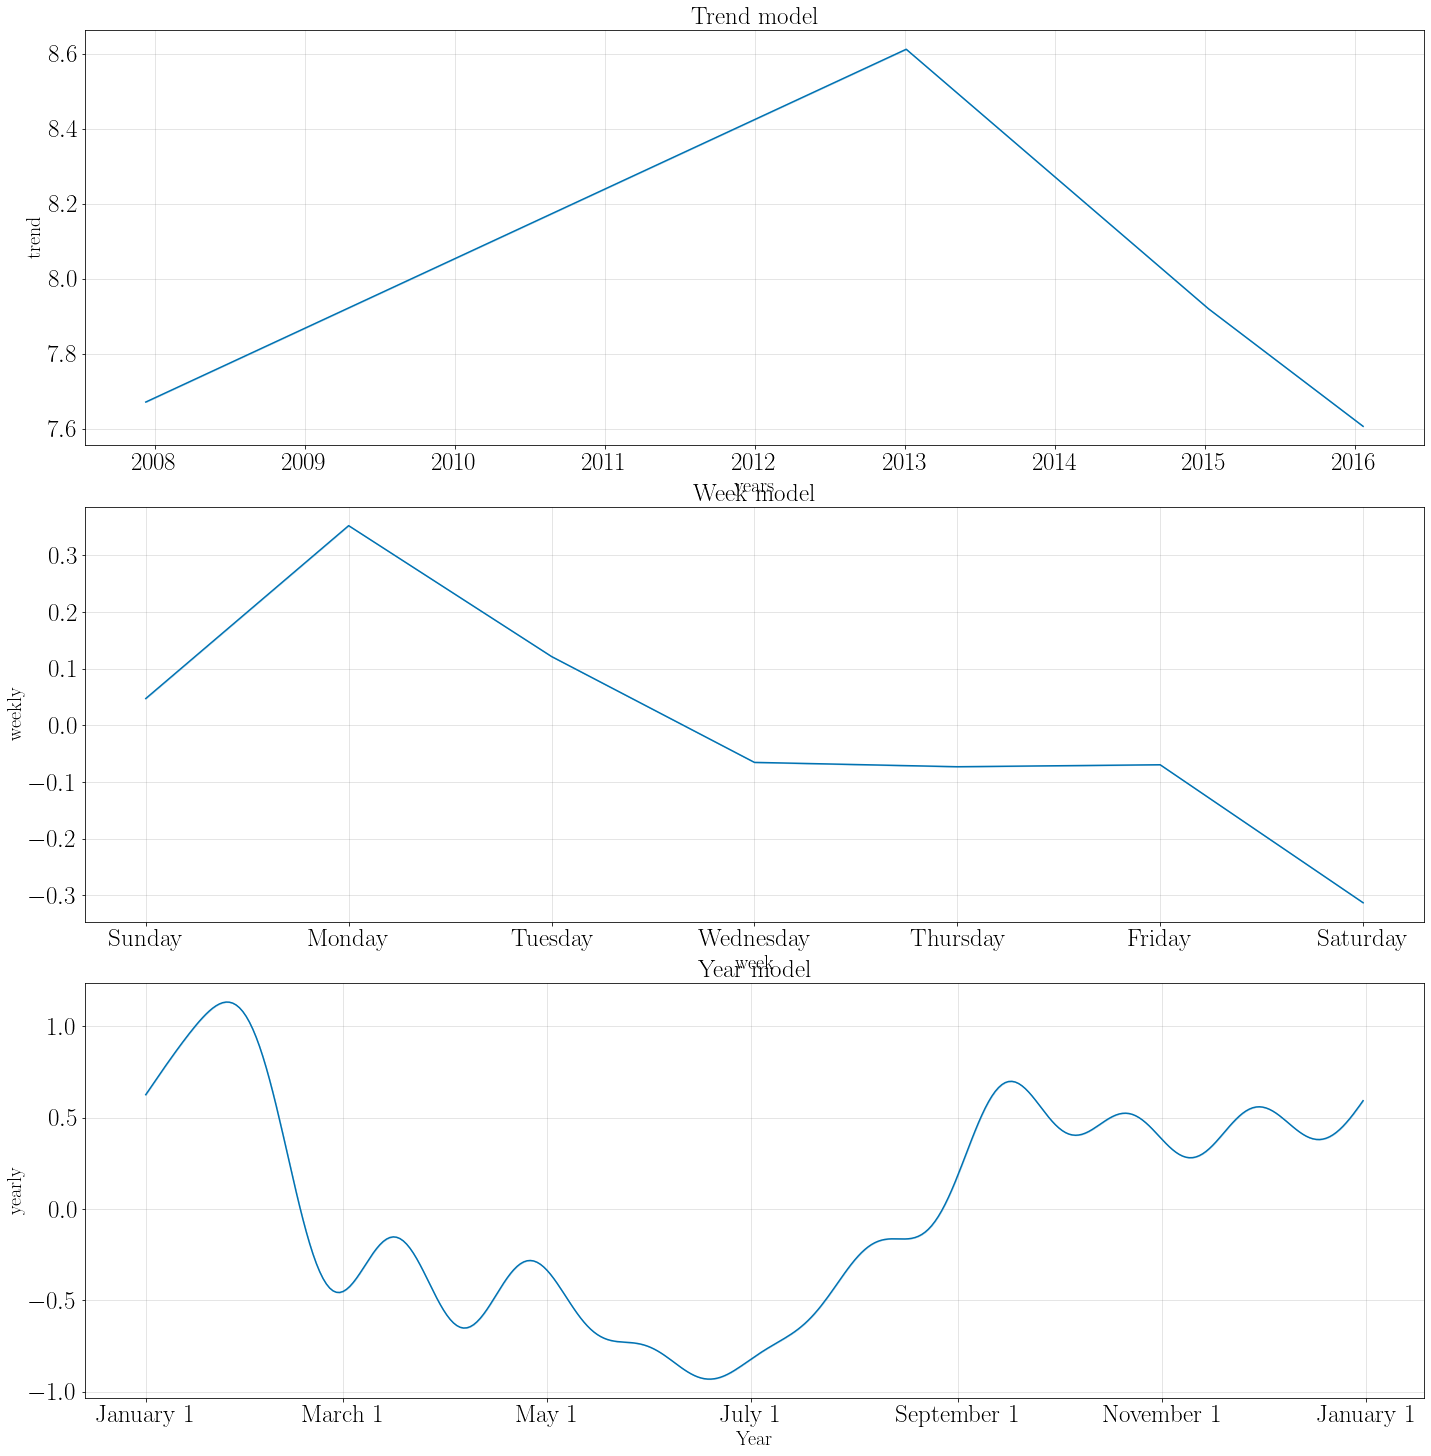

In [40]:
## Visualize the individual models used to create the observation model
fig     = model.plot_components(forecast, figsize = (20,20) )


ax1,ax2,ax3  = fig.get_axes()


ax1.set_xlabel('years')
ax1.set_title('Trend model')

ax2.set_title('Week model')
ax2.set_xlabel('week')

ax3.set_title('Year model')
ax3.set_xlabel('Year')